# EDA for Mercedes-Benz Kagglin'

## Questions we want to be asking ourselves
1. What are the data characteristics?
2. How is our data split between train and test?
3. What does the distribution of our target look like?
4. **What is the process behind our data** and what could affect the target?

Useful resources for this came from:

https://www.kaggle.com/anokas/mercedes-eda-xgboost-starter-0-55

https://www.kaggle.com/headsortails/mercedas-update2-intrinsic-noise

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
pal = sns.color_palette()
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

## Data summaries

In [3]:
pd.options.display.max_columns = 999
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
train_df.head()

Train shape: (4209, 378)
Test shape: (4209, 377)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

*Observations*: 
* We have a target (continuous var.) for time in seconds, and anonymised features, which seem to be a mixture of categorical (possibly ordinal) and binary. We also have an ID column, which isn't equal to the row number and could therefore be significant. 

* Also data set is pretty small relative to the number of features, especially considering these are categorical and therefore may need to be encoded.

In [4]:
dtype_df = train_df.dtypes.reset_index() # reset_index() labels each row with an index and converts to a column
dtype_df.columns = ["Count", "Column type"]
print(dtype_df.groupby("Column type").aggregate('count').reset_index())

  Column type  Count
0       int64    369
1     float64      1
2      object      8


The above seems to confirm our thoughts about the data

## Missing values

In [5]:
missing_df = train_df.isnull().sum(axis=0).reset_index() # row wise summation (i.e. sum along columns)
missing_df.columns = ["column_name", "missing_count"]
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by = "missing_count")
missing_df

,column_name,missing_count


*Observations*: Doesn't seem to be any missing values

## Univariate analysis

### Target

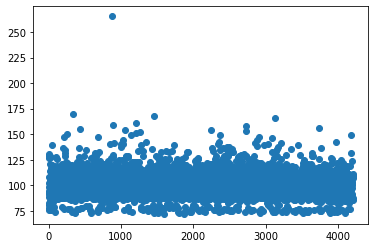

In [6]:
plt.figure()
plt.scatter(train_df.index, train_df.y)

(50, 275)

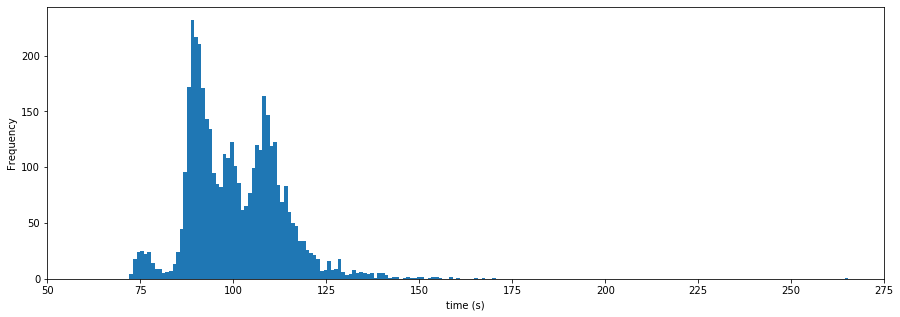

In [117]:
plt.figure(figsize=(15, 5))
train_df['y'].plot.hist(density = False, bins = 200)
plt.xlabel('time (s)')
plt.xlim([50,275])

*Observations*:
* The scatter plot shows an extreme value at around 275s with the remained of the targets lying below 175s. 
* There seem to be **four peaks at around 75s, 90s, 100s and 110s**. These could represent groups of similar testing complexity?
* Minima may also indicate someting?

#### Gaussian mixture models

In [129]:
gmm = GaussianMixture(n_components=5, n_init = 10, tol = 1e-5, max_iter = 100)
gmm.fit(train_df['y'].to_numpy().reshape(-1,1))


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=1e-05, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [170]:
means = gmm.means_
covars = gmm.covariances_

In [171]:
means = np.sort(means.ravel())
covars = np.sort(covars.ravel())

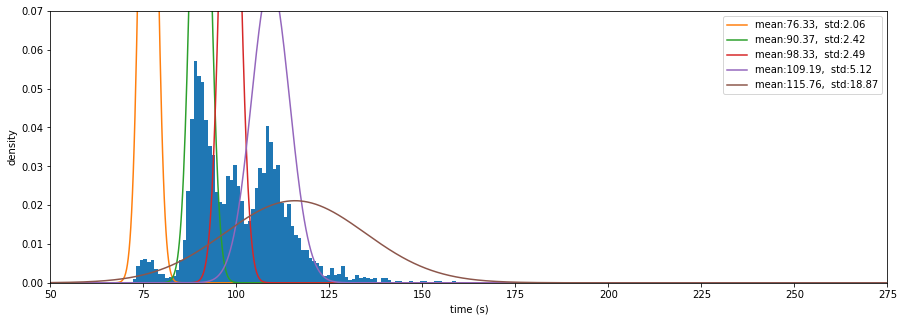

In [172]:
x = np.linspace(50,275,1000).reshape(-1,1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)
plt.figure(figsize=(15, 5))
train_df['y'].plot.hist(density = True, bins = 200)
plt.xlabel('time (s)')
plt.ylabel('density')
plt.xlim([50,275])
lines = []
for i, mean in enumerate(means):
    std = np.sqrt(covars[i])
    plt.plot(x, norm.pdf(x, mean, std))
    color = sns.color_palette()[i+1]
    lines += [Line2D([], [], color=color, label = f'mean:{mean:.2f},  std:{std:.2f}')] 
plt.ylim([0,0.07])
plt.legend(handles = lines)

### Features

#### (Nominal) Categorical features: X1-X8

In [8]:
def box_scatter_plot(var_name):
    plt.figure(figsize=(15, 10))
    col_order = train_df.groupby([var_name]).median()['y']
    col_order = col_order.sort_values().index
    sns.boxplot(x = var_name, y = 'y', data = train_df, order = col_order, color = pal[2])
    sns.stripplot(x = var_name, y = 'y', data = train_df, order = col_order, jitter = True, marker = 'o',
                  alpha = 0.8, color = 'black')
    plt.xlabel(var_name)
    plt.ylabel('y - time (s)')

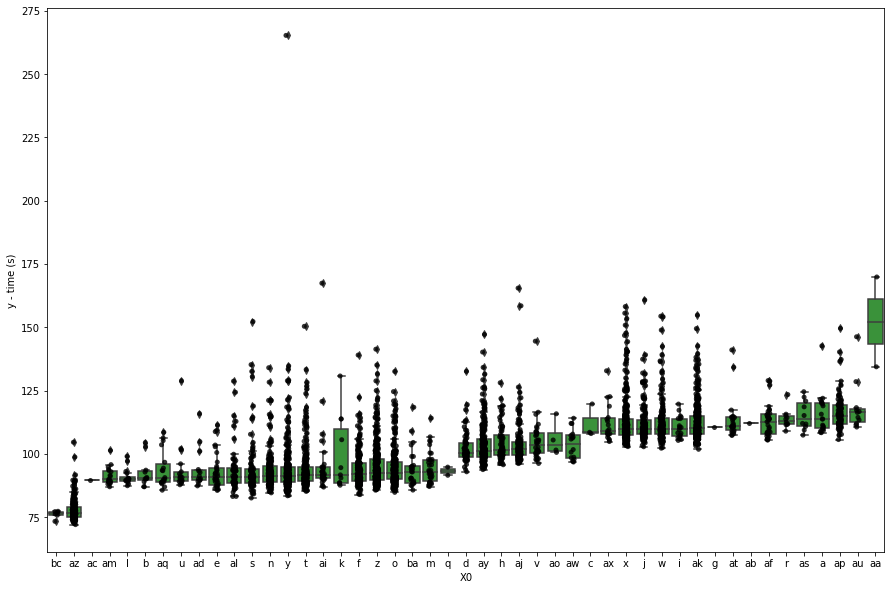

In [9]:
box_scatter_plot('X0')

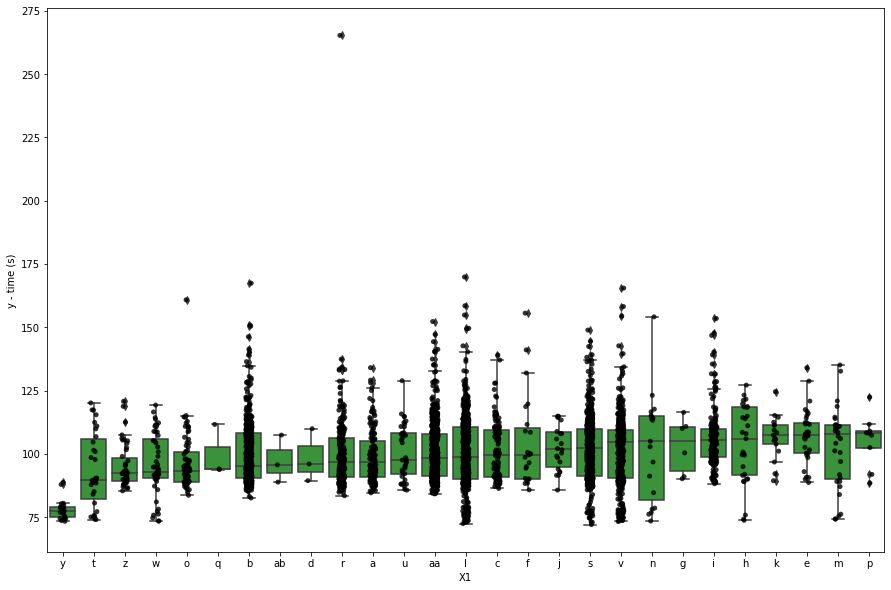

In [10]:
box_scatter_plot('X1')

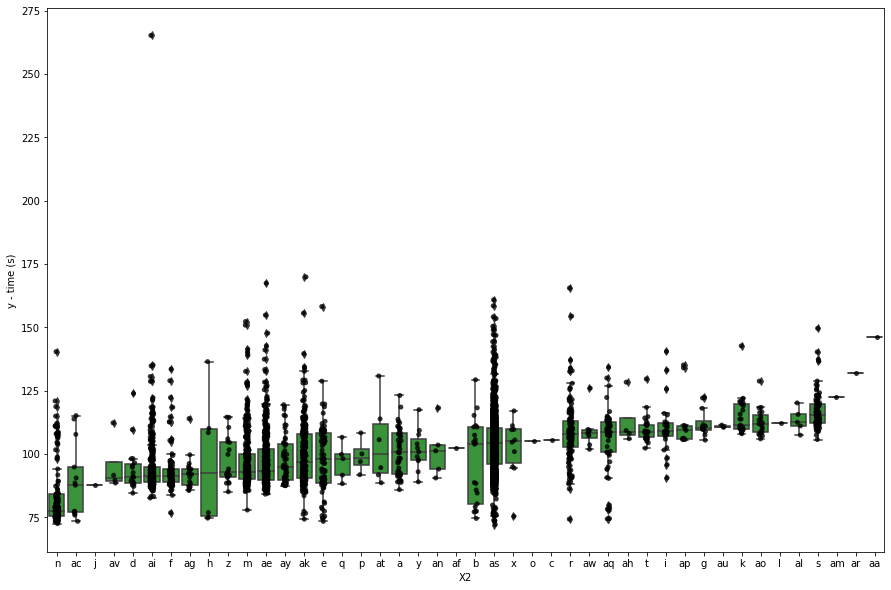

In [11]:
box_scatter_plot('X2')

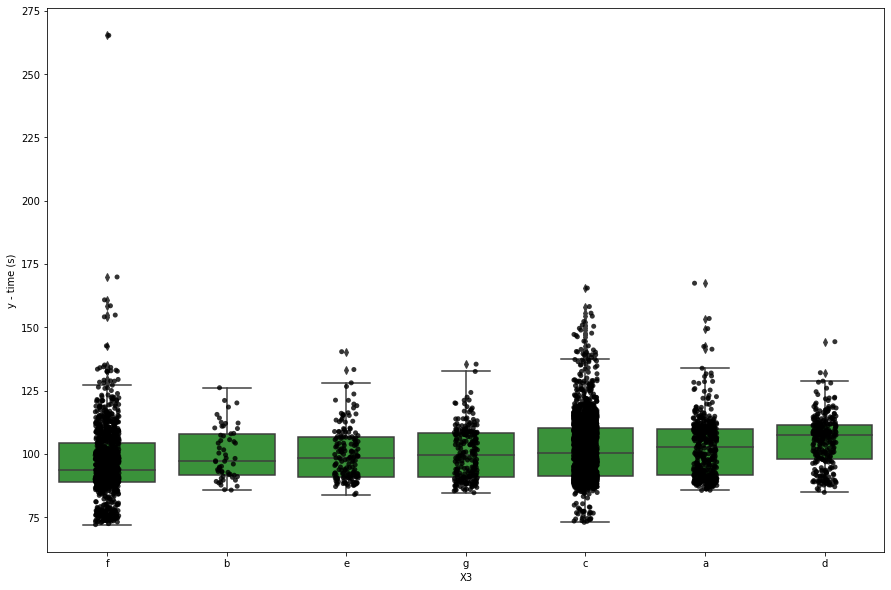

In [12]:
box_scatter_plot('X3')

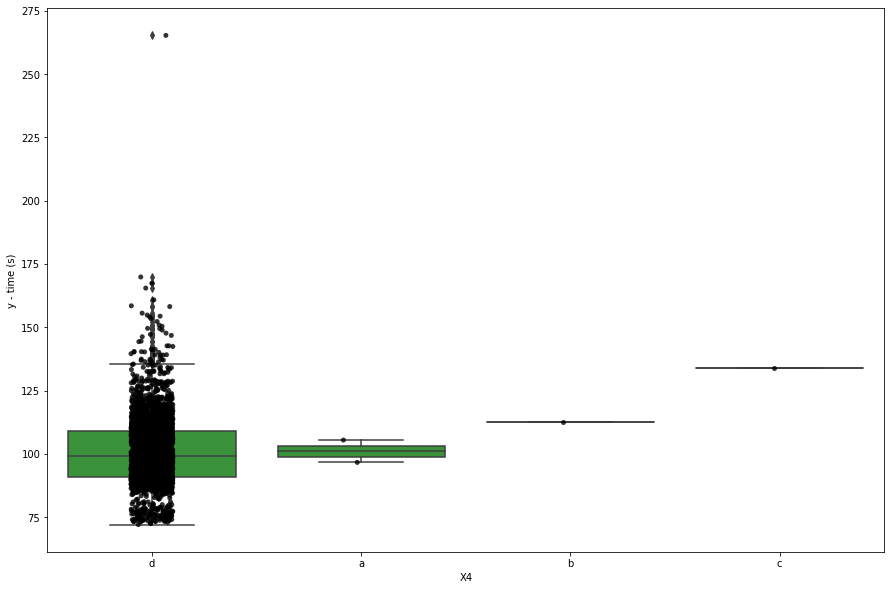

In [13]:
box_scatter_plot('X4')

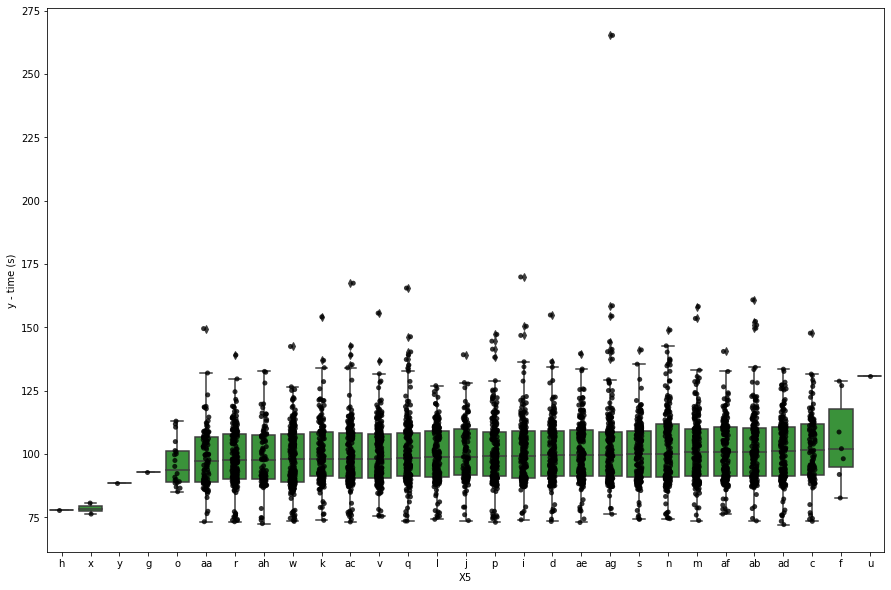

In [14]:
box_scatter_plot('X5')

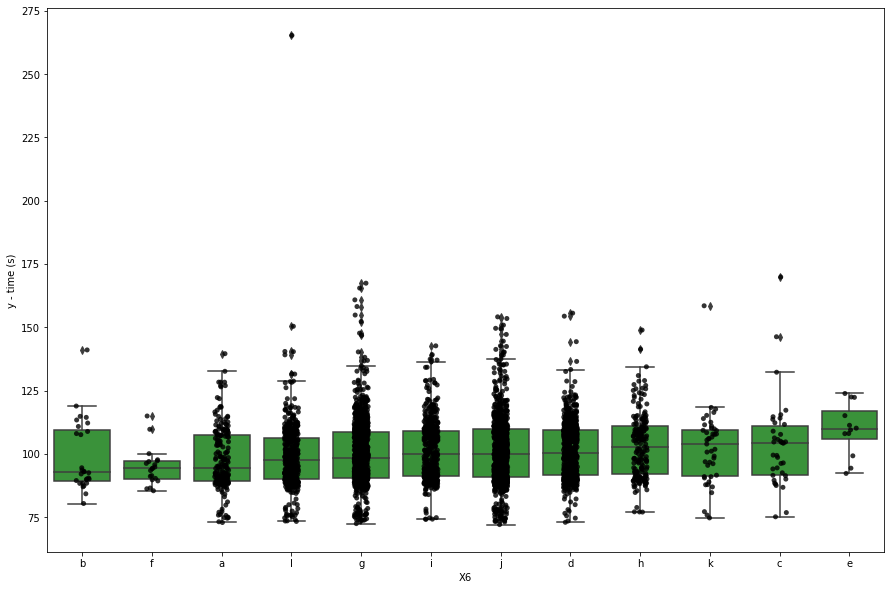

In [15]:
box_scatter_plot('X6')

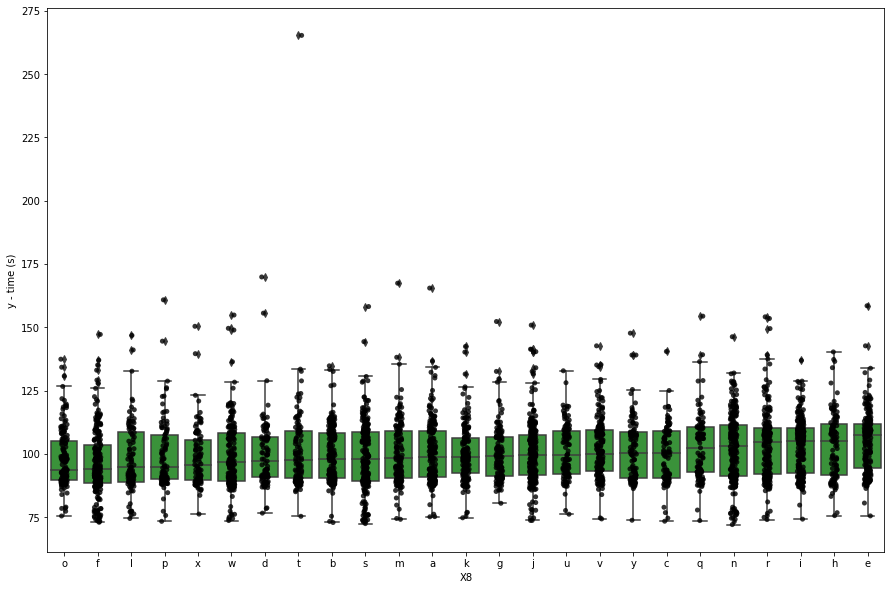

In [16]:
box_scatter_plot('X8')

*Observations*:
* X0 and X2 seem to show the highest variability in boxplot characteristics between category levels. X0 shows the strongest groups within the boxplots, and may be related to the structures we saw in the target distribution.
* The shortest times (around 75s) seem to be associated with feature:levels X0:bc, X0:az, X1:y, X2:n, X5:h, X5:x.
* The longest times (>115s) seem to be fairly consistent with the features in X0 and X2. 
* X3,X5,X6 and X8 show characaterstics that are fairly consistent across their levels.
* X4 has most of its data associated with category level 'd'. 


#### (Binary) Categorical features: X10-X385

Questions or things to do for next week:
* Binary variable EDA
* Identifying noise EDA
* Getting rid of redundant features? What's the best way to do this and when should we do this e.g. after looking at interactions?
* Feature interaction EDA 

In sum: the more I learn about feature manipulation tasks the more I see EDA as a way of exploring the data so you can make the most of what you've got.

In [70]:
binary_dict = {column:[len(train_df[column].loc[train_df[column] == 0]), len(train_df[column].loc[train_df[column] == 1])] for column in train_df.iloc[:,10:].columns}
columns = list(binary_dict.keys())
zeros_count_list = [binary_dict[column][0] for column in columns]
ones_count_list = [binary_dict[column][1] for column in columns]
ind = np.arange(len(binary_dict))

mean_y_dict = {column:[np.mean(train_df['y'].loc[train_df[column] == 0]), np.mean(train_df['y'].loc[train_df[column] == 1])] for column in train_df.iloc[:,10:].columns}
zeros_ymean_list = [mean_y_dict[column][0] for column in columns]
ones_ymean_list = [mean_y_dict[column][1] for column in columns]
means_df = pd.DataFrame({'column_name':columns+columns, 'value':[0]*len(binary_dict)+[1]*len(binary_dict), 'y_mean':zeros_ymean_list+ones_ymean_list})

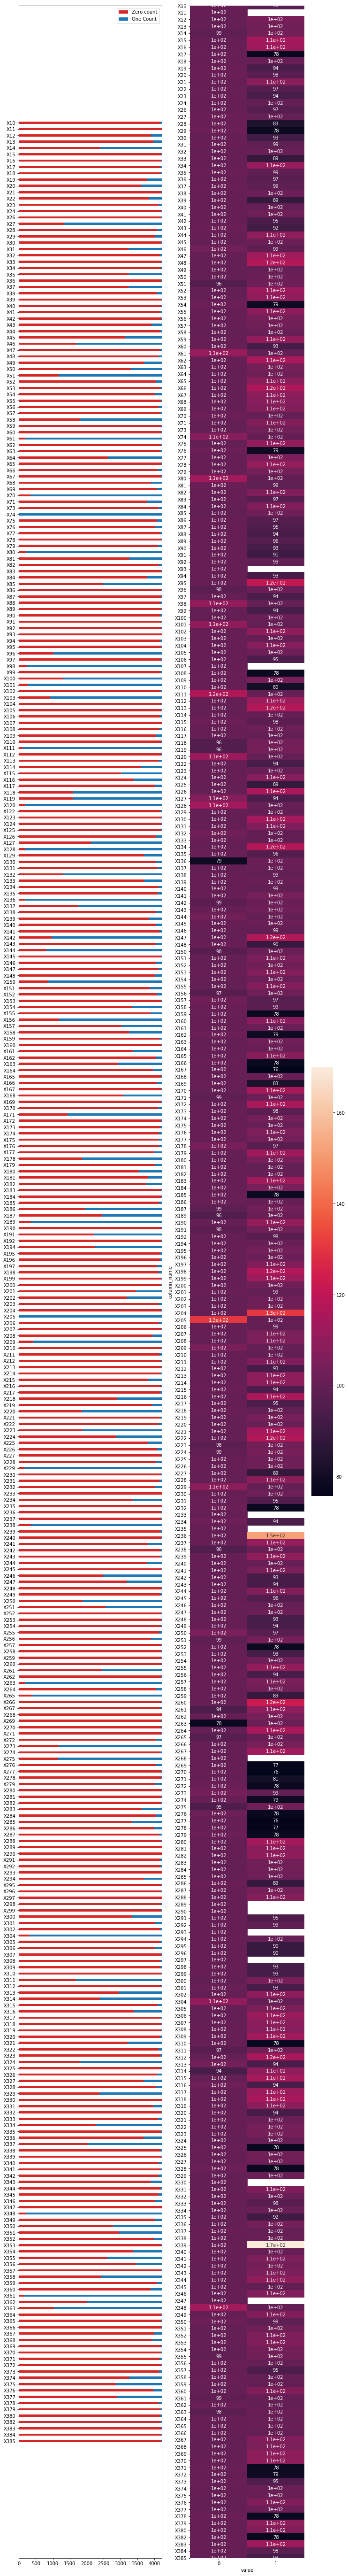

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(12,100), )

# plot 1
p1 = axs[0].barh(ind, zeros_count_list, 0.35, color='tab:red')
p2 = axs[0].barh(ind, ones_count_list, 0.35, left=zeros_count_list, color='tab:blue')
axs[0].set_yticks(ind)
axs[0].set_yticklabels(binary_dict.keys())
axs[0].invert_yaxis()
axs[0].legend((p1[0], p2[0]), ('Zero count', 'One Count'))

# plot 2
means_df = means_df.pivot('column_name', 'value', 'y_mean')
means_df.index = pd.CategoricalIndex(means_df.index, categories= columns)
means_df.sort_index(level=0, inplace=True)
sns.heatmap(means_df, annot=True, ax = axs[1])

In [69]:
np.mean(train_df['y'])

100.66931812782121

*Observations*

**Bar plots**
* Large porition of the bar plots seem to be mostly filled with zeros. 
* Interestingly, there are also not that many plots where the distribution between 0 and 1 is approximately equal.

**Heat maps**
* Some very interesting stuffs here.
* Correlations between predictors and a mean 75 s peak seem to be X17, X29, X54, X76, X108, X136, X159, X166,... and X269-X279. In pretty much every case, these small peaks are correlated to only a small few 0's or 1's.
* Correlations between predictors with equally distributed binary levels, and correlations of these levels to noticeable contrasts between peaks seem to be X51?, X118-X119 (infact these two features seem to be pretty similar... colinearity?), X127 (well distributed), X178, X250, X261 (well distributed), X311-X314 (well distributed). Could these features be good predictors?
* Finally, mean peaks >120 s, are correlated with X204-X205 (>= 130 s), X236 (>= 150 s), X339 (>= 170 s). In every case, there seems to be either a very low number of 0s with lots of 1s (e.g. 205), or visa-versa (e.g. 204). 


### (Intrinsic) noise

According to Mercedes, different workers drive the cars which could introduce intrinsic noise. In particular there could be noticeable differences between test times for cars that have the same parameter settings. We want to investigate this effect and quantify her...

In [232]:
train_dup = train_df.drop(['ID','y'], axis = 1)
train_dup = train_df[train_dup.duplicated(keep=False)]
train_dup = train_dup.sort_values(by=list(train_df.columns[2:])) # group duplicates

Text(0.5, 0, 'Counts')

<Figure size 1080x360 with 0 Axes>

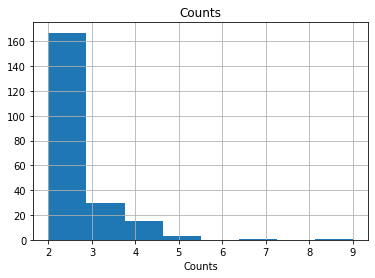

In [248]:
# Counts on duplicate groups
plt.figure(figsize=(15, 5))
train_dup.groupby(list(train_df.columns[2:])).size().reset_index(name='Counts').hist(column = 'Counts', density = False, bins = 8)
plt.xlabel('Counts')

ID    75.660426
y      3.502580
dtype: float64

<Figure size 1080x360 with 0 Axes>

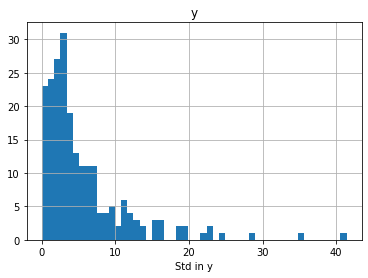

In [253]:
# Counts on duplicate groups
plt.figure(figsize=(15, 5))
train_dup.groupby(list(train_df.columns[2:])).std().hist(column = 'y', density = False, bins = 50)
plt.xlabel('Std in y')
train_dup.groupby(list(train_df.columns[2:])).std().median()

*Observations*

**Counts**
* Most of the duplicates are pairs, but groups of four or more also exist.

**Standard deviation**
* Median of the stds is around 3.5 which is relatively low, but does show there is some intrinsic noise knocking about. 
* Also, there are a few duplicates which seem to have high stds (as high as 40), suggesting noise can be farily significant. This will restrict achievable accuracy on prediction.

Would be interesting to know if high stds are consistent with high mean values of y for each duplicate group. 


### Some closing thoughts and questions